# Question 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sn
import joblib
import cv2 as cv
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from matplotlib import colors as cma
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

In [ ]:
for i in range(1,6):
  file = '/content/drive/My Drive/ML_Assignment3/cifar-10-batches-py/data_batch_'+str(i)
  with open(file, 'rb') as fo:
    data = pickle.load(fo, encoding='bytes')
  if (i==1):
    samples = data[b'data']
    labels = np.array(data[b'labels'])
  else:
    samples = np.concatenate((samples,data[b'data']))
    labels = np.concatenate((labels, np.array(data[b'labels'])))

In [ ]:
file = '/content/drive/My Drive/ML_Assignment3/cifar-10-batches-py/test_batch'
with open(file, 'rb') as fo:
  data = pickle.load(fo, encoding='bytes')

  samples_test = data[b'data']
  labels_test = np.array(data[b'labels'])

In [ ]:
print(samples.shape, labels.shape)
print(samples_test.shape, labels_test.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


In [ ]:
print(samples)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]


In [ ]:
sample = samples[:10000,:]
label = labels[:10000]

# Visualising images

In [ ]:
def plot_images(set_):
  k=0
  while(k<10):
      i=0
      j=(set_-1)*10000
      f = plt.figure(figsize=(12,12))

      while(i < 10):
          if(labels[j] == k):
              plt.subplot(k+1, 10, i+1)
              im = np.array(samples[j])
              im_r = im[0:1024].reshape(32, 32)
              im_g = im[1024:2048].reshape(32, 32)
              im_b = im[2048:].reshape(32, 32)
              
              img = np.dstack((im_r, im_g, im_b)) # np.vstack((im_r, im_g, im_b))
              
              plt.imshow(img)
              plt.axis('off')
              i+=1
          j+=1
  #     plt.legend(str(k))
  #     print(k)
      plt.title('Class:'+str(k))
      plt.show()
      k+=1

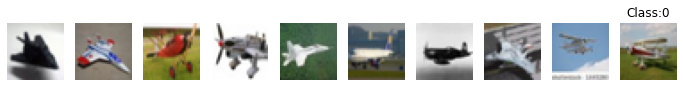

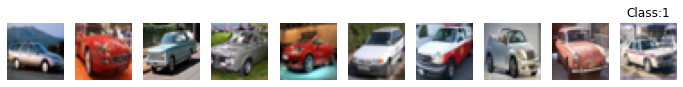

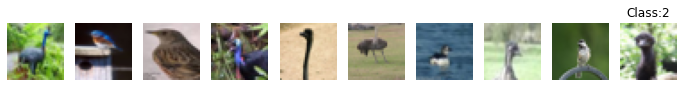

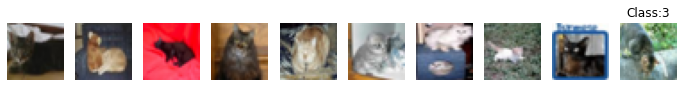

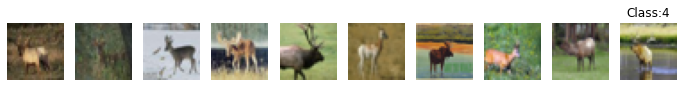

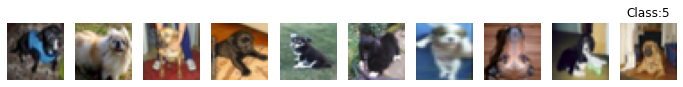

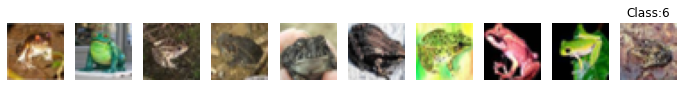

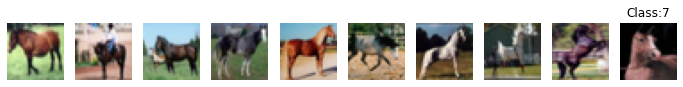

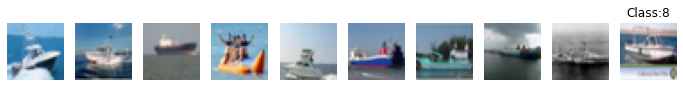

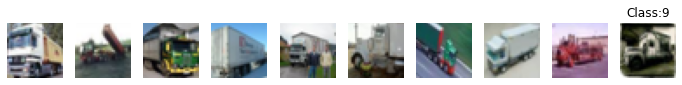

In [ ]:
plot_images(1)

# PCA

In [ ]:
# sc = StandardScaler()
# sample = sc.fit_transform(sample)

In [ ]:
sm = np.concatenate((samples,samples_test))
print(sm.shape)

(60000, 3072)


In [ ]:
pca = PCA(.90)

In [ ]:
XA = pca.fit_transform(sm)

In [ ]:
# joblib.dump(X,'/content/drive/My Drive/ML_Assignment3/PCA_samples')
X = joblib.load('/content/drive/My Drive/ML_Assignment3/PCA_samples')

In [ ]:
# joblib.dump(X,'/content/drive/My Drive/ML_Assignment3/PCA_samples_test')
XT = joblib.load('/content/drive/My Drive/ML_Assignment3/PCA_samples_test')

In [ ]:
# joblib.dump(XA,'/content/drive/My Drive/ML_Assignment3/PCA_samples_ALL')
XA = joblib.load('/content/drive/My Drive/ML_Assignment3/PCA_samples_ALL')

In [ ]:
XA.shape

(60000, 99)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9003187633153609

In [ ]:
# df = pd.DataFrame()
# df['x_axis'] = sample[:,0]
# df['y_axis'] = sample[:,1]
# df['labels'] = label
# plt.figure(figsize=(12,10))
# sn.scatterplot(
#     x="x_axis", y="y_axis",
#     hue="labels",
#     palette=sn.color_palette("hls", 10),
#     data=df,
#     legend="full",
# )

# HOG

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


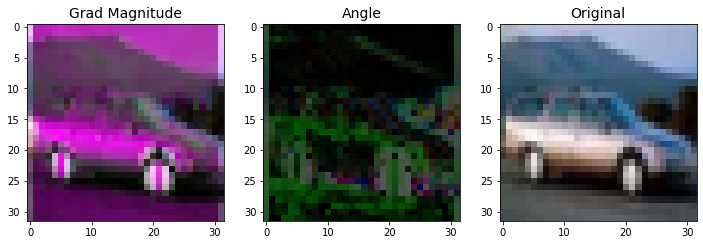

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


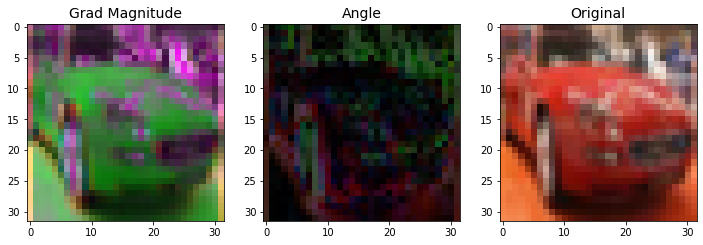

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


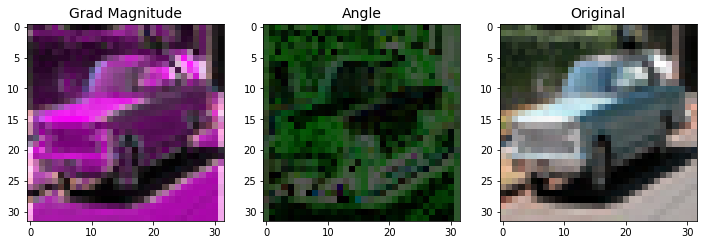

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


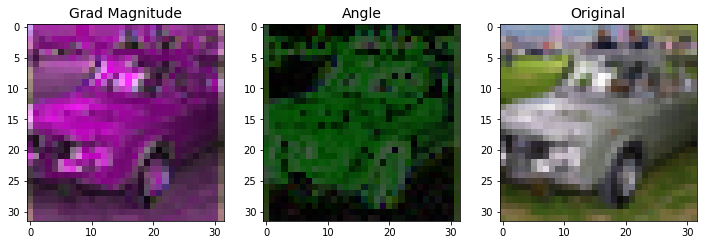

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


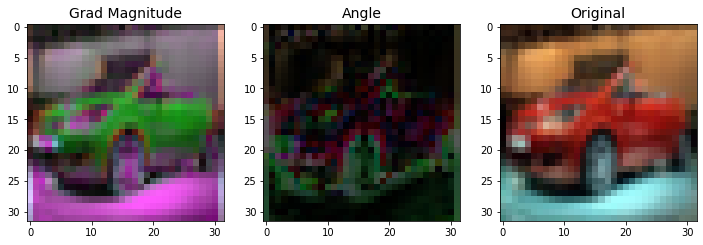

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


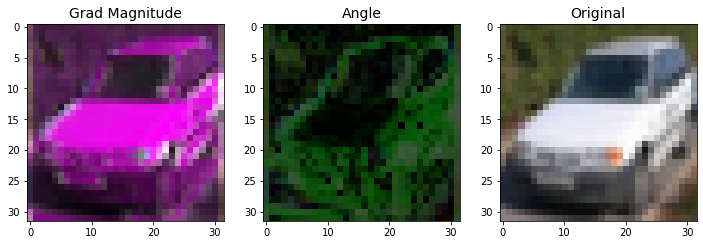

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


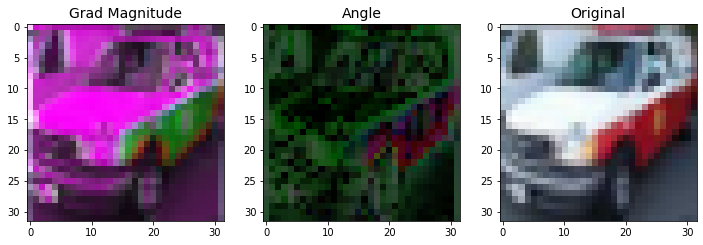

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


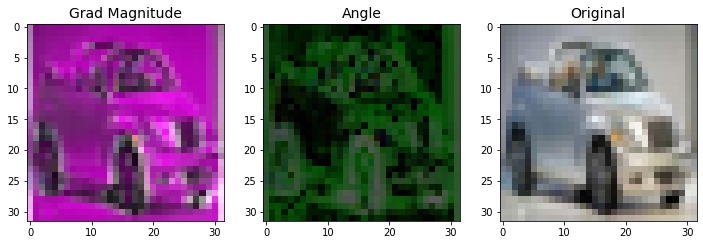

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


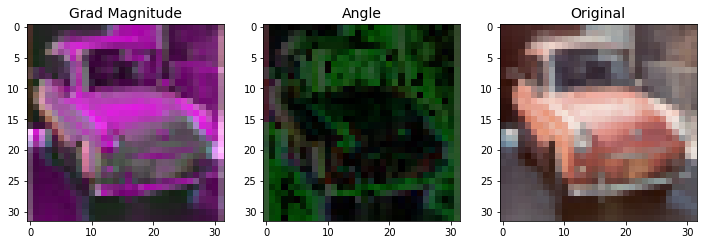

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


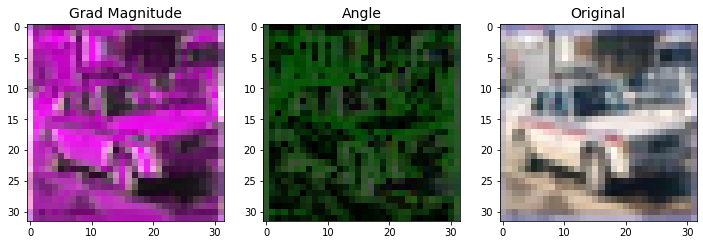

In [ ]:
img_lbl = 1
b = 0
c = 0
ls = [i1 for i1 in range(0,181) if i1%20 == 0]
while (c<10):
  if (labels[b] == img_lbl):
    im = np.array(samples[b])
    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))
    # img = rgb2gray(img)
    frq = np.full((181),0,int)
    img1 = []
    img2 = []
    fd = np.full((9),0,dtype=float)
    for k in range(img.shape[0]):
      imag = img[k]
      grad_x = np.full((imag.shape[0],imag.shape[1]), -1, dtype=int)
      grad_y = np.full((imag.shape[0],imag.shape[1]), -1, dtype=int)

      for i in range(0,imag.shape[0]):
        for j in range(0,imag.shape[1]):
          if (i>0 and i<(imag.shape[0]-1) and j==1):
            x_dir = abs(int(imag[i][j-1]) - int(imag[i][j+1]))
            grad_x[i][j] = x_dir
            y_dir = abs(int(imag[i-1][j]) - int(imag[i+1][j]))
            grad_y[i][j] = y_dir
          elif (i>0 and i<(imag.shape[0]-1)):
            y_dir = abs(int(imag[i-1][j]) - int(imag[i+1][j]))
            grad_y[i][j] = y_dir
          elif (i==0):
            grad_y[i][j] = int(imag[i+1][j])
            grad_x[i][1] = abs(int(imag[i][2]) - int(imag[i][0]))
          elif (i==(imag.shape[0]-1)):
            grad_y[i][j] = int(imag[i-1][j])
            grad_x[i][1] = abs(int(imag[i][2]) - int(imag[i][0]))
          if (j==0):
            grad_x[i][j] = int(imag[i][j+1])
          elif (j==2):
            grad_x[i][j] = int(imag[i][j-1])
          if (grad_x[i][j] == 0):
              grad_x[i][j] = 1
      grad_mag = np.sqrt(np.square(grad_x)+np.square(grad_y))
      angle_ = np.degrees(np.arctan(grad_y/grad_x))
      angle_ = angle_.astype(int)
      
      img1.append(grad_mag.astype(int))
      img2.append(angle_)
      # for d in angle_:
      #   frq[d]+=1
    # print(fd/10000)
    img1 = np.array(img1)
    # print(img1.shape)
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))
    ax[0].imshow(img1)
    ax[0].set_title('Grad Magnitude',size=14)
    ax[1].imshow(img2)
    ax[1].set_title('Angle',size=14)
    ax[2].imshow(img)
    ax[2].set_title('Original',size=14)
    plt.show()
    c+=1
  b+=1

In [ ]:
def HOG(samples):
  # print(samples.shape)
  c = 0
  features = []
  ls = [i1 for i1 in range(0,181) if i1%20 == 0]
  while (c<samples.shape[0]):
    
    fdc = np.full((144),0,float)
    i_fdc = 0
    im = np.array(samples[c])
    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))
    imag = rgb2gray(img)
    
    grad_x = np.full((imag.shape[0],imag.shape[1]), 0.8, dtype=float)
    grad_y = np.full((imag.shape[0],imag.shape[1]), 0.8, dtype=float)

    for i in range(0,imag.shape[0]):
      for j in range(0,imag.shape[1]):
        if (i>0 and i<(imag.shape[0]-1) and j>0 and j<(imag.shape[1]-1)):
          x_dir = abs(imag[i][j-1] - imag[i][j+1])
          grad_x[i][j] = x_dir
          y_dir = abs(imag[i-1][j] - imag[i+1][j])
          grad_y[i][j] = y_dir
        elif (i>0 and i<(imag.shape[0]-1)):
          y_dir = abs(imag[i-1][j] - imag[i+1][j])
          grad_y[i][j] = y_dir
        elif (i==0 and j>0 and j<(imag.shape[1]-1)):
          grad_y[i][j] = imag[i+1][j]
          grad_x[i][j] = abs(imag[i][j+1] - imag[i][j-1])
        elif (i==(imag.shape[0]-1) and j>0 and j<(imag.shape[1]-1)):
          grad_y[i][j] = imag[i-1][j]
          grad_x[i][j] = abs(imag[i][j+1] - imag[i][j-1])
        if (j==0):
          grad_x[i][j] = imag[i][j+1]
        elif (j==(imag.shape[1]-1)):
          grad_x[i][j] = imag[i][j-1]
        if (grad_x[i][j] == 0):
            grad_x[i][j] = 1
    # print(imag,grad_x,grad_y)
    grad_mag = np.sqrt(np.square(grad_x)+np.square(grad_y))
    angle_ = np.degrees(np.arctan(grad_y/grad_x))
    angle_ = angle_.astype(int)
    # print(angle_.shape, grad_mag.shape)
    img1 = grad_mag #.astype(int)
    img2 = angle_
    fd = np.full((9),0,dtype=float)
    i1 = 0
    while (i1<32):
      for k1 in range(angle_.shape[1]):
        for j1 in range(0,len(ls)):
          if (angle_[i1][k1] >= ls[j1] and angle_[i1][k1] <= ls[j1+1]):
            mul1 = (angle_[i1][k1] - ls[j1])/20
            mul2 = (ls[j1+1] - angle_[i1][k1])/20
            fd[int(angle_[i1][k1]/20)] += mul1 * grad_mag[i1][k1]
            fd[int(angle_[i1][k1]/20)+1] += mul2 * grad_mag[i1][k1]
        if (k1%8 == 7):
          for i2 in range(9):
            fdc[i_fdc] = np.around(fd[i2],decimals=3)
            i_fdc+=1
            # print(i_fdc)
          fd = np.full((9),0,dtype=float)
      i1 += 8
    # print(fdc)
    smal = fdc.reshape(4,4,9)
    smal_16 = np.full((3,3,36),0,float)
    i=0
    while (i<4):
      j=0
      while (j<4):
        if (i<3 and j<3):
           smal_16[i][j] = np.concatenate((smal[i][j],smal[i][j+1],smal[i+1][j],smal[i+1][j+1]))
           sss = np.sqrt(np.sum(np.square(smal_16[i][j])))
           smal_16[i][j] = smal_16[i][j]/sss
           #print(sss)
        j+=1
      i+=1

    # print(smal_16)
    smal_16 = smal_16.reshape(324)
    # print(smal_16)
    features.append(smal_16)
    if (c%5000 == 0):
      print(c)
    c+=1
  return np.array(features)

In [ ]:
f_d = HOG(sm)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


In [ ]:
f_d.shape

(60000, 144)

In [ ]:
# joblib.dump(f_d,'/content/drive/My Drive/ML_Assignment3/HOG_samples_ALL1')
f_d = joblib.load('/content/drive/My Drive/ML_Assignment3/HOG_samples_ALL')

In [ ]:
i=0
feature_hog_clhist = np.full((f_d.shape[0],int(f_d.shape[1]/2)),0,float)
j=0
while (i<144):
  clm1 = f_d[:,i]
  clm2 = f_d[:,i+1]
  clm3 = (clm1+clm2)/2
  feature_hog_clhist[:,j] = clm3
  j+=1
  # print(clm3.shape)
  i+=2

In [ ]:
feature_hog_clhist.shape

(60000, 72)

# Colored Histogram

In [ ]:
def color_hist(samples):
  features = []
  for k in range(samples.shape[0]):
    fdch = np.full((36),0,float)
    im = samples[k]
    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))
    # print(img.shape)
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    tc = hsv[:,:,0]
    for i in range(tc.shape[0]):
      for j in range(tc.shape[1]):
        fdch[int(tc[i][j]/5)] += 1
    features.append(fdch)
    if (k%10000 == 0):
      print(k)
  return np.array(features)

In [ ]:
foc = color_hist(sm)

0
10000
20000
30000
40000
50000


In [ ]:
foc.shape

(60000, 36)

In [ ]:
final_fd = np.concatenate((feature_hog_clhist,foc),1)

In [ ]:
final_fd.shape

(60000, 108)

In [ ]:
# joblib.dump(final_fd,'/content/drive/My Drive/ML_Assignment3/HOG_samples_FinalFD1')
final_fd = joblib.load('/content/drive/My Drive/ML_Assignment3/HOG_samples_FinalFD1')

In [ ]:
print(hsv[:,:,0])

[[101 103 103 ...  96  98 100]
 [102 105 105 ...  96 101 103]
 [101 101 100 ...  96 102 100]
 ...
 [ 28  26  25 ...  24  22  22]
 [ 40  25  25 ...  24  23  24]
 [ 89  86  84 ...  90  90  92]]


# TSNE

In [ ]:
tsne = TSNE(n_components=2)
tsne_results_2D = tsne.fit_transform(f_d)

In [ ]:
# joblib.dump(tsne_results_2D, '/content/drive/My Drive/ML_Assignment3/TSNE_HOG')
tsne_results_2D = joblib.load('/content/drive/My Drive/ML_Assignment3/TSNE_HOG')

Text(0.5, 1.0, 'TSNE plot for PCA')

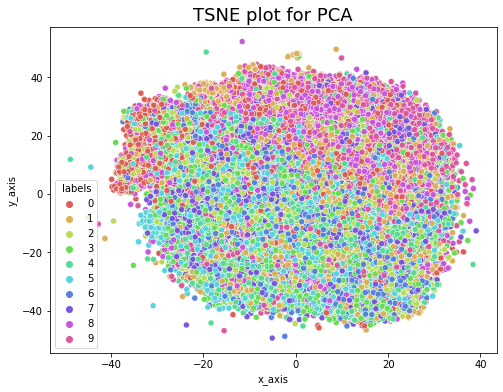

In [ ]:
df = pd.DataFrame()
df['x_axis'] = tsne_results_2D[:,0]
df['y_axis'] = tsne_results_2D[:,1]
df['labels'] = labels
plt.figure(figsize=(8,6))
sn.scatterplot(
    x="x_axis", y="y_axis",
    hue="labels",
    palette=sn.color_palette("hls", 10),
    data=df,
    legend="full",
)
plt.title("TSNE plot for PCA", size=18)

Text(0.5, 1.0, 'TSNE plot for HOG')

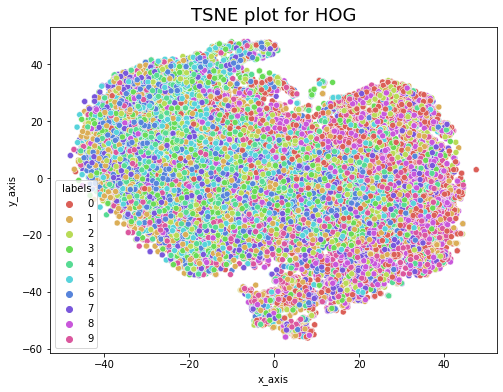

In [ ]:
df = pd.DataFrame()
df['x_axis'] = tsne_results_2D[:,0]
df['y_axis'] = tsne_results_2D[:,1]
df['labels'] = labe
plt.figure(figsize=(8,6))
sn.scatterplot(
    x="x_axis", y="y_axis",
    hue="labels",
    palette=sn.color_palette("hls", 10),
    data=df,
    legend="full",
)
plt.title("TSNE plot for HOG", size=18)

# GridSearch

In [ ]:
print(XA.shape, final_fd.shape)

(60000, 99) (60000, 108)


In [ ]:
labe = np.concatenate((labels, labels_test))
print(labe.shape)

(60000,)


In [ ]:
df = pd.DataFrame(final_fd)
df['label'] = labe

In [ ]:
X_train = df.iloc[:50000,:-1].values
y_train = df.iloc[:50000,-1].values

In [ ]:
X_test = df.iloc[50000:,:-1].values
y_test = df.iloc[50000:,-1].values

In [ ]:
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(50000, 108) (50000,) (10000, 108) (10000,)


In [ ]:
parameters = {'kernel' : ['rbf'], 'C':[0.1, 1, 10, 100]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
def run_on_particular(kernel, C, X_train, y_train, X_test, y_test):
  start_time = time.time()
  svc = SVC(C=C, kernel=kernel)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  test_ac = accuracy_score(y_test, y_pred)
  print('\033[1m'+"Testing Accuracy (on best parameters obtained) is: {0:.2f}%".format(test_ac*100))
  y_pred = svc.predict(X_train)
  train_ac = accuracy_score(y_train, y_pred)
  print("Training Accuracy (on best parameters obtained) is: {0:.2f}%".format(train_ac*100))
  stop_time = time.time()
  print("Runtime (on best parameters obtained) is: {0:.2f} sec".format(stop_time-start_time))
  return svc

# GridSearch PCA

In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
clf.refit_time_

756.87900213

In [ ]:
clf.best_score_

0.5211

In [ ]:
# joblib.dump(clf,'/content/drive/My Drive/ML_Assignment3/GridSearch_PCA')
clf = joblib.load('/content/drive/My Drive/ML_Assignment3/GridSearch_PCA')

['/content/drive/My Drive/ML_Assignment3/GridSearch_PCA']

# GridSearch HOG

In [ ]:
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
clf.best_score_

43.6001225

In [ ]:
clf.refit_time_

1501.3400871

In [ ]:
# joblib.dump(clf,'/content/drive/My Drive/ML_Assignment3/GridSearch_HOG')
clf = joblib.load('/content/drive/My Drive/ML_Assignment3/GridSearch_HOG')

['/content/drive/My Drive/ML_Assignment3/GridSearch_HOG']

# 3rd Part PCA

In [ ]:
svc = run_on_particular('rbf', 10, X_train, y_train, X_test, y_test)

Testing Accuracy (on best parameters obtained) is: 56.06%
Training Accuracy (on best parameters obtained) is: 92.17%
Runtime (on best parameters obtained) is: 1236.07 sec


In [ ]:
# joblib.dump(svc,'/content/drive/My Drive/ML_Assignment3/Runon_PCA_svc')
svc_pca = joblib.load('/content/drive/My Drive/ML_Assignment3/Runon_PCA_svc')

## 4th part for PCA

In [ ]:
X_train1 = X_train[svc_pca.support_]
y_train1 = y_train[svc_pca.support_]

In [ ]:
print(X_train1.shape, y_train1.shape, X_test.shape, y_test.shape)

(43574, 99) (43574,) (10000, 99) (10000,)


In [ ]:
svc_spt_pca = run_on_particular('rbf', 10, X_train1, y_train1, X_test, y_test)

Testing Accuracy (on best parameters obtained) is: 56.06%
Training Accuracy (on best parameters obtained) is: 91.15%
Runtime (on best parameters obtained) is: 922.18 sec


In [ ]:
# joblib.dump(svc_spt_pca,'/content/drive/My Drive/ML_Assignment3/Runon_PCA_svc_SupportVectors')

['/content/drive/My Drive/ML_Assignment3/Runon_PCA_svc_SupportVectors']

# 3rd Part HOG

In [ ]:
svc = run_on_particular('rbf', 100, X_train, y_train, X_test, y_test)

Testing Accuracy (on best parameters obtained) is: 45.88%
Training Accuracy (on best parameters obtained) is: 49.33%
Runtime (on best parameters obtained) is: 2071.07 sec


In [ ]:
# joblib.dump(svc,'/content/drive/My Drive/ML_Assignment3/Runon_HOG_svc')
svc_hog = joblib.load('/content/drive/My Drive/ML_Assignment3/Runon_HOG_svc')

## 4th Part for HOG

In [ ]:
X_train1 = X_train[svc_hog.support_]
y_train1 = y_train[svc_hog.support_]
print(X_train1.shape, y_train1.shape, X_test.shape, y_test.shape)

(47342, 108) (47342,) (10000, 108) (10000,)


In [ ]:
svc_spt_hog = run_on_particular('rbf', 100, X_train1, y_train1, X_test, y_test)

Testing Accuracy (on best parameters obtained) is: 45.90%
Training Accuracy (on best parameters obtained) is: 47.33%
Runtime (on best parameters obtained) is: 1595.89 sec


In [ ]:
# joblib.dump(svc_spt_hog,'/content/drive/My Drive/ML_Assignment3/Runon_PCA_svc_SupportVectors')
svc_spt_hog = joblib.load('/content/drive/My Drive/ML_Assignment3/Runon_PCA_svc_SupportVectors')

# Other kernels Testing

In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.28

In [ ]:
c = 1
while (c<=100):
  svc = SVC(kernel='rbf', C=c)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print(accuracy_score(y_test, y_pred))
  c += 5

0.4695
0.464
0.4635
0.4635
0.4675
0.4685
0.471
0.472
0.4715
0.471
0.468
0.4695
0.469
0.4685
0.4665
0.466
0.4675
0.4675
0.4675
0.4675


In [ ]:
ls = [i for i in range(0,181) if i%20 == 0]
print(ls)

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180]


In [ ]:
X_train1 = svc.support_vectors_
y_train1 = y_train[svc.support_]

In [ ]:
print(X_train1.shape, y_train1.shape)

(4927, 324) (4927,)


In [ ]:
k = 4800
X_train = X_train1[:k,:]
X_test = X_train1[k:,:]
y_train = y_train1[:k]
y_test = y_train1[k:] 
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc1.predict(X_test)
accuracy_score(y_test, y_pred)

0.18110236220472442